In [1]:
# Library
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Data Processing and Analysis
import os
import time
import pandas as pd
import numpy as np

# Machine Learning Models and Feature Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Deep Learning with TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Evaluation Metrics and Model Persistence
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import shap
import joblib
import pickle

# Data Visualization
import matplotlib.pyplot as plt

# PE (Portable Executable) File Processing
import pefile

# Progress Bar
from tqdm import tqdm

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-PDFMal2022\\PDFMalware2022.csv") #DM--> Dataset Malware

In [3]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [4]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['Class'] == "Benign"]
MalwareData = DM[DM['Class'] == "Malicious"]

In [5]:
# Histogram penyebaran data benign dan malware pada fitur Fine name.
x = BenignData["Fine name"]
y = MalwareData["Fine name"]
bins = np.linspace(0, 1500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Fine name")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()


KeyboardInterrupt



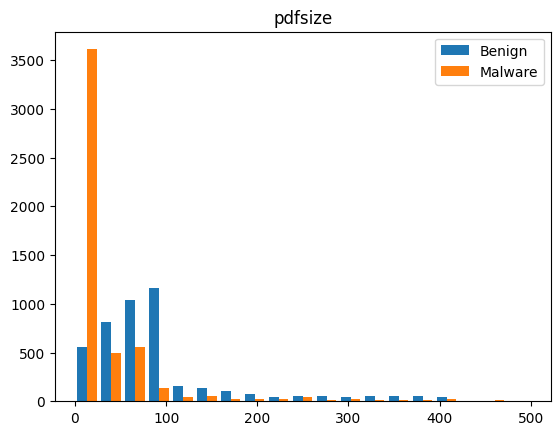

In [6]:
# Histogram penyebaran data benign dan malware pada fitur pdfsize.
x = BenignData["pdfsize"]
y = MalwareData["pdfsize"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pdfsize")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

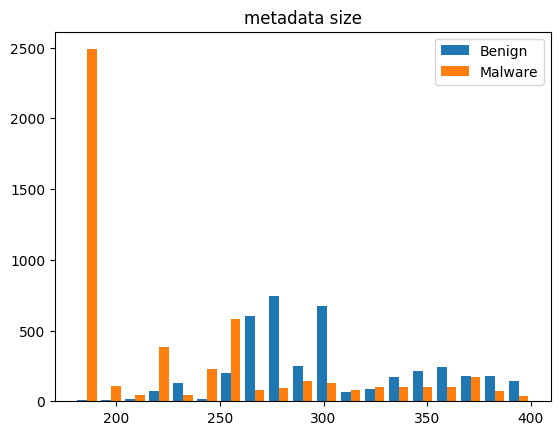

In [7]:
# Histogram penyebaran data benign dan malware pada fitur metadata size.
x = BenignData["metadata size"]
y = MalwareData["metadata size"]
bins = np.linspace(180, 400, 20) # Berbeda karena mayoritas data bernilai 180 sampai 400, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("metadata size")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

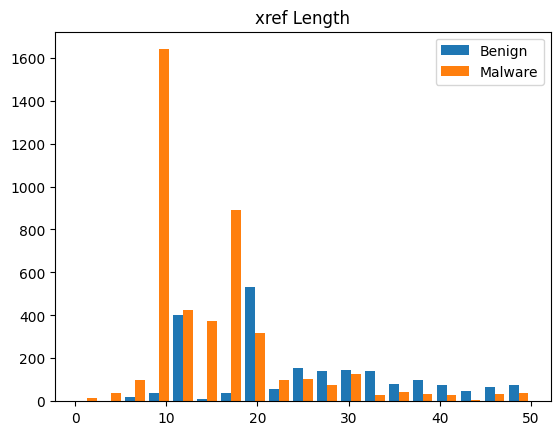

In [8]:
# Histogram penyebaran data benign dan malware pada fitur xref Length.
x = BenignData["xref Length"]
y = MalwareData["xref Length"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("xref Length")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

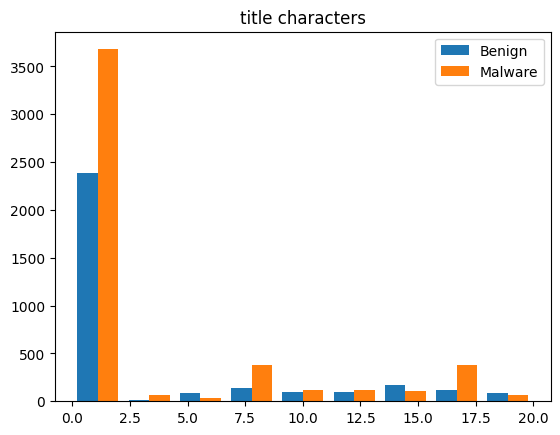

In [9]:
# Histogram penyebaran data benign dan malware pada fitur title characters.
x = BenignData["title characters"]
y = MalwareData["title characters"]
bins = np.linspace(0, 20, 10) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("title characters")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

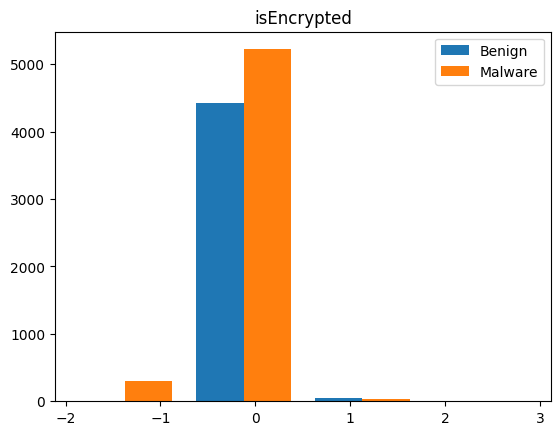

In [10]:
# Histogram penyebaran data benign dan malware pada fitur isEncrypted.
x = BenignData["isEncrypted"]
y = MalwareData["isEncrypted"]
bins = np.linspace(-2, 3, 5) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("isEncrypted")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

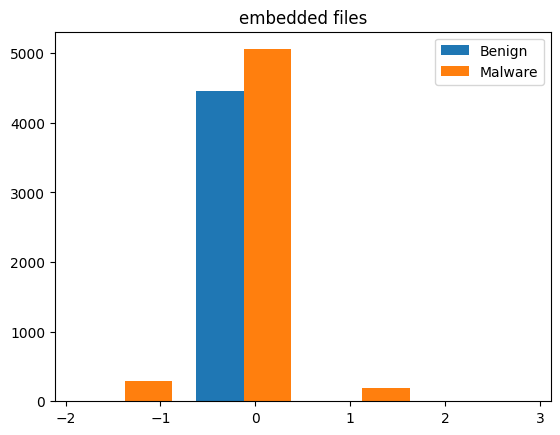

In [11]:
# Histogram penyebaran data benign dan malware pada fitur embedded files.
x = BenignData["embedded files"]
y = MalwareData["embedded files"]
bins = np.linspace(-2, 3, 5) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("embedded files")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

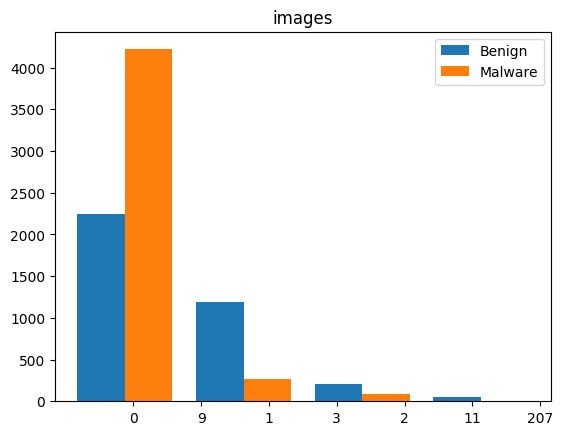

In [12]:
# Histogram penyebaran data benign dan malware pada fitur images.
x = BenignData["images"]
y = MalwareData["images"]
bins = np.linspace(-1, 6, 5) # Berbeda karena mayoritas data bernilai -1 sampai 6, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("images")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

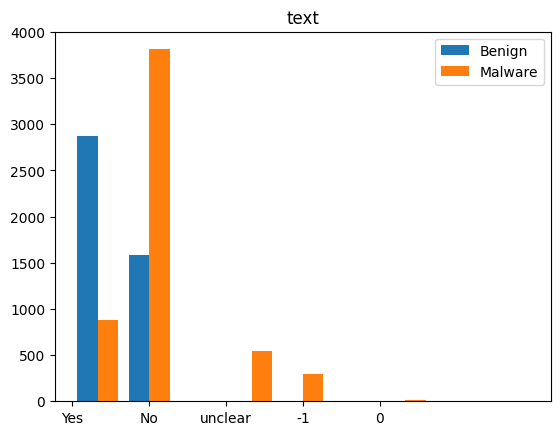

In [13]:
# Histogram penyebaran data benign dan malware pada fitur text.
x = BenignData["text"]
y = MalwareData["text"]
bins = np.linspace(0, 6, 10) # Berbeda karena mayoritas data bernilai 0 sampai 6, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("text")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


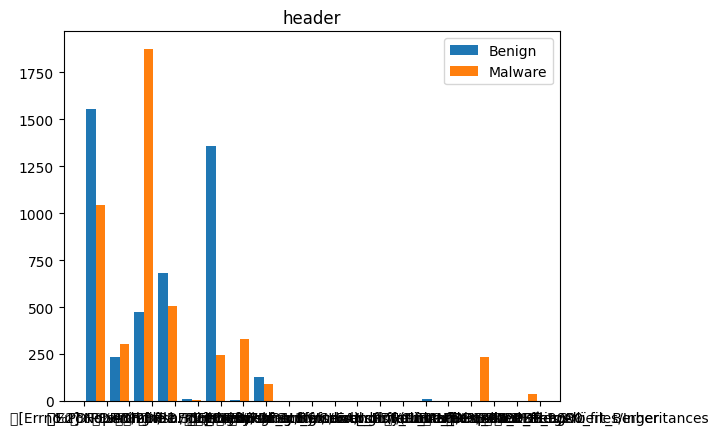

In [14]:
# Histogram penyebaran data benign dan malware pada fitur header.
x = BenignData["header"]
y = MalwareData["header"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("header")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

KeyboardInterrupt: 

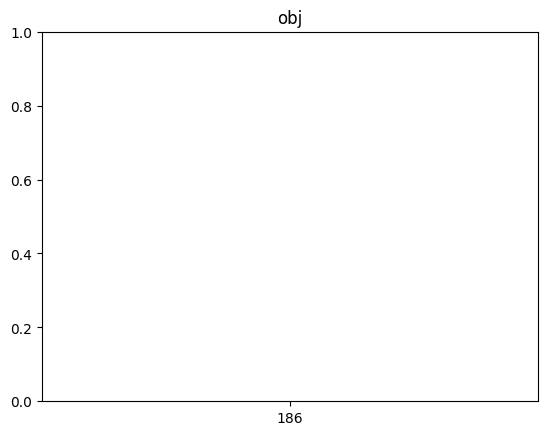

In [15]:
# Histogram penyebaran data benign dan malware pada fitur obj.
x = BenignData["obj"]
y = MalwareData["obj"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("obj")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['10', '19', '12', ..., '8', '9', '299'], dtype=object)

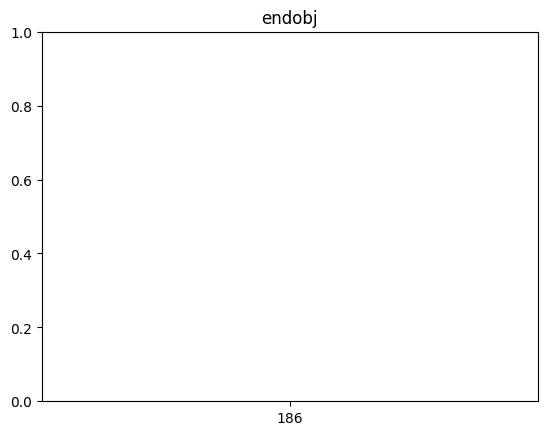

In [16]:
# Histogram penyebaran data benign dan malware pada fitur endobj.
x = BenignData["endobj"]
y = MalwareData["endobj"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("endobj")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

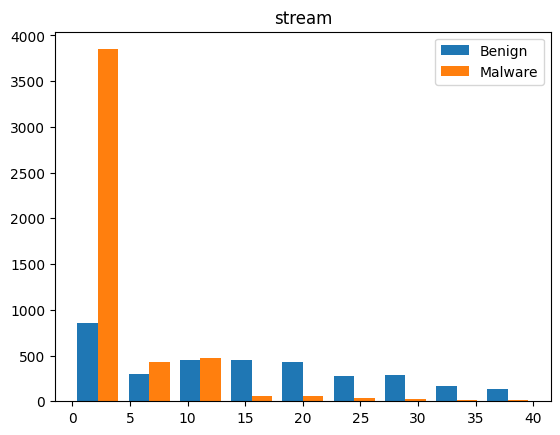

In [19]:
# Histogram penyebaran data benign dan malware pada fitur stream.
x = BenignData["stream"]
y = MalwareData["stream"]
bins = np.linspace(0, 40, 10) # Berbeda karena mayoritas data bernilai 0 sampai 40, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("stream")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['3', '9', '3', ..., '2', '3', '62'], dtype=object)

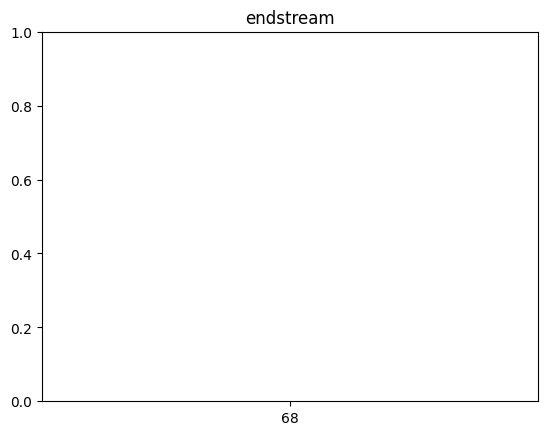

In [20]:
# Histogram penyebaran data benign dan malware pada fitur endstream.
x = BenignData["endstream"]
y = MalwareData["endstream"]
bins = np.linspace(0, 40, 10) # Berbeda karena mayoritas data bernilai 0 sampai 40, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("endstream")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['1', '1', '1', ..., '1', '1', '46'], dtype=object)

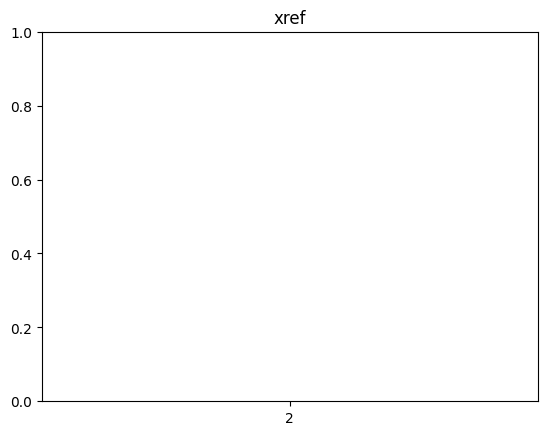

In [21]:
# Histogram penyebaran data benign dan malware pada fitur xref.
x = BenignData["xref"]
y = MalwareData["xref"]
bins = np.linspace(0, 40, 10) # Berbeda karena mayoritas data bernilai 0 sampai 40, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("xref")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

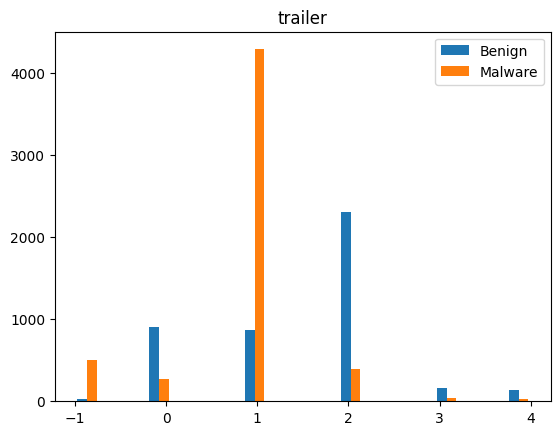

In [22]:
# Histogram penyebaran data benign dan malware pada fitur trailer.
x = BenignData["trailer"]
y = MalwareData["trailer"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("trailer")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['1', '1', '1', ..., '1', '1', '24'], dtype=object)

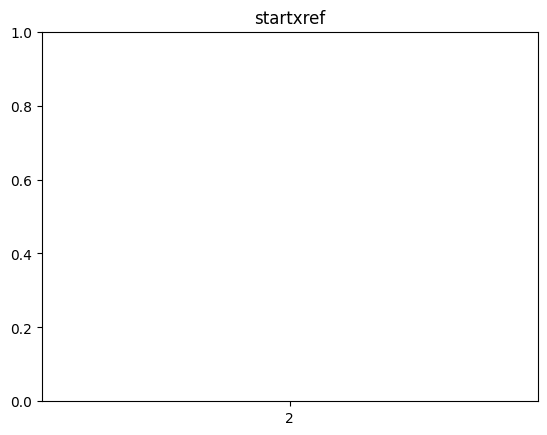

In [23]:
# Histogram penyebaran data benign dan malware pada fitur startxref.
x = BenignData["startxref"]
y = MalwareData["startxref"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("startxref")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['1', '1', '2', ..., '1', '1', '23'], dtype=object)

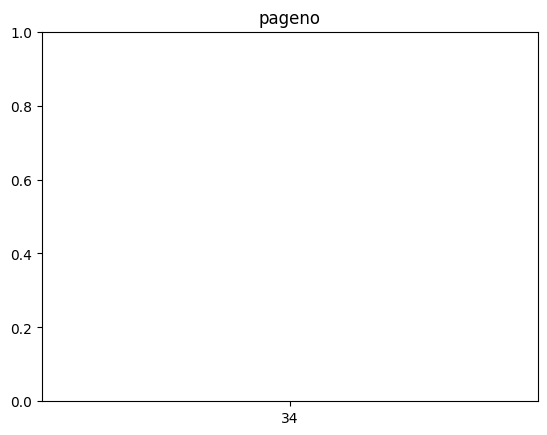

In [24]:
# Histogram penyebaran data benign dan malware pada fitur pageno.
x = BenignData["pageno"]
y = MalwareData["pageno"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pageno")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

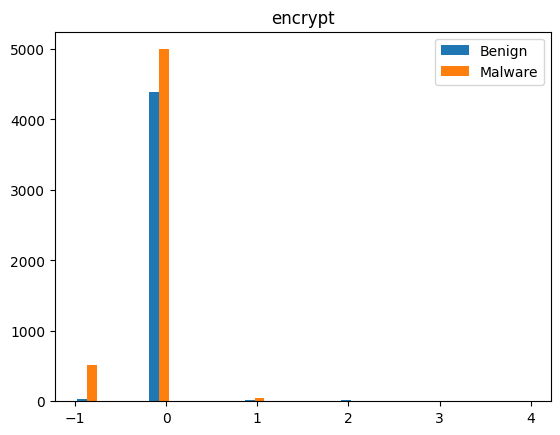

In [25]:
# Histogram penyebaran data benign dan malware pada fitur encrypt.
x = BenignData["encrypt"]
y = MalwareData["encrypt"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("encrypt")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

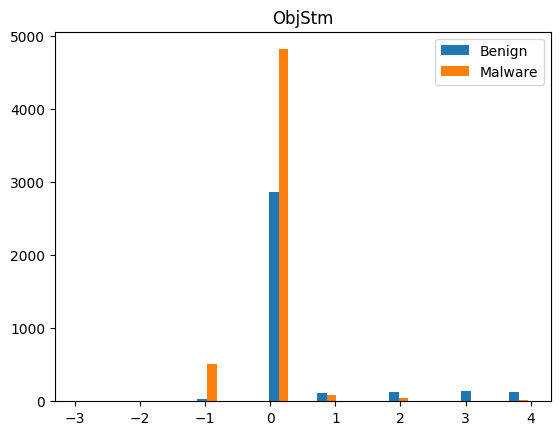

In [17]:
# Histogram penyebaran data benign dan malware pada fitur ObjStm.
x = BenignData["ObjStm"]
y = MalwareData["ObjStm"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ObjStm")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['1', '0', '1', ..., '1', '1', '149'], dtype=object)

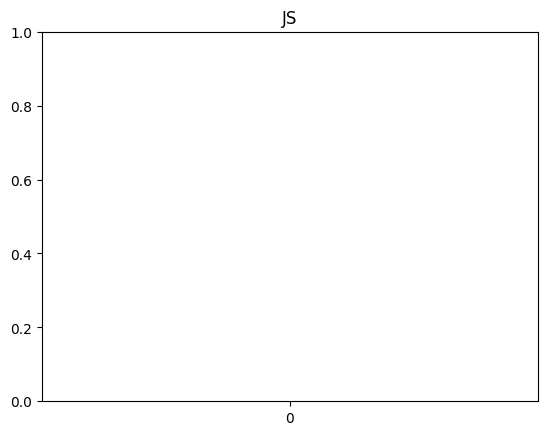

In [18]:
# Histogram penyebaran data benign dan malware pada fitur JS.
x = BenignData["JS"]
y = MalwareData["JS"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("JS")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['1', '0', '2', ..., '1', '1', '149'], dtype=object)

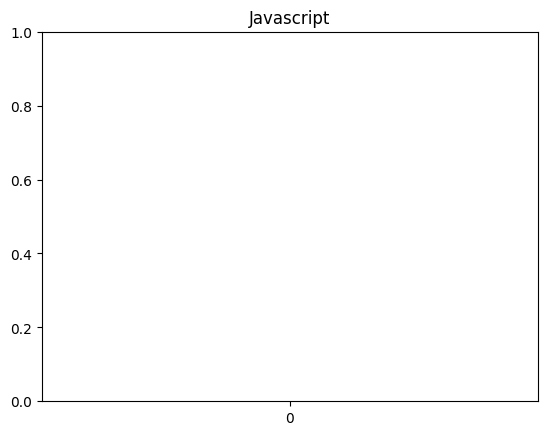

In [26]:
# Histogram penyebaran data benign dan malware pada fitur Javascript.
x = BenignData["Javascript"]
y = MalwareData["Javascript"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Javascript")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '0', ..., '0', '0', '23'], dtype=object)

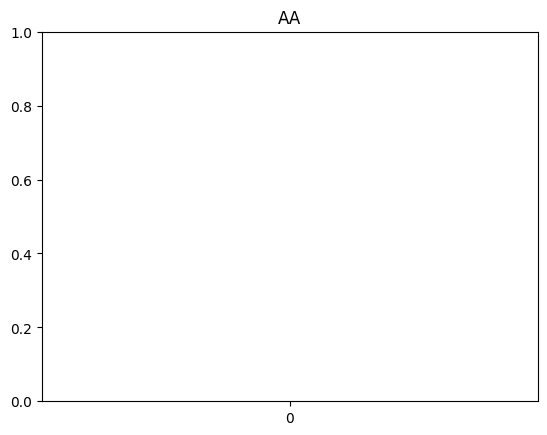

In [30]:
# Histogram penyebaran data benign dan malware pada fitur AA.
x = BenignData["AA"]
y = MalwareData["AA"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("AA")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['1', '0', '1', ..., '1', '1', '0'], dtype=object)

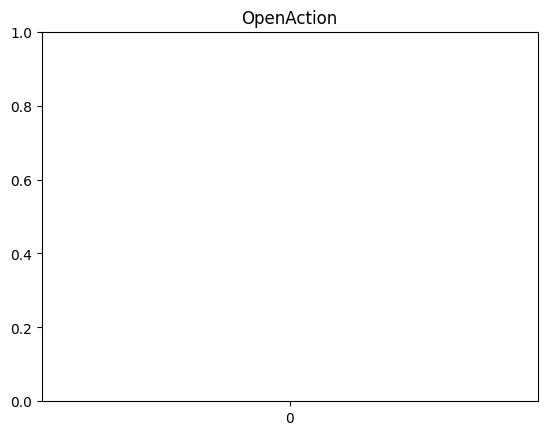

In [27]:
# Histogram penyebaran data benign dan malware pada fitur OpenAction.
x = BenignData["OpenAction"]
y = MalwareData["OpenAction"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OpenAction")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur Acroform.
x = BenignData["Acroform"]
y = MalwareData["Acroform"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Acroform")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

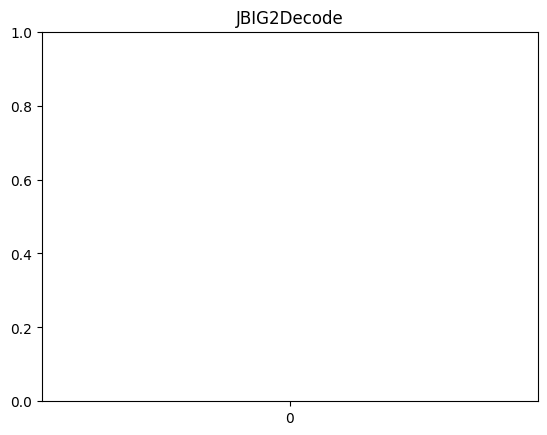

In [28]:
# Histogram penyebaran data benign dan malware pada fitur JBIG2Decode.
x = BenignData["JBIG2Decode"]
y = MalwareData["JBIG2Decode"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("JBIG2Decode")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

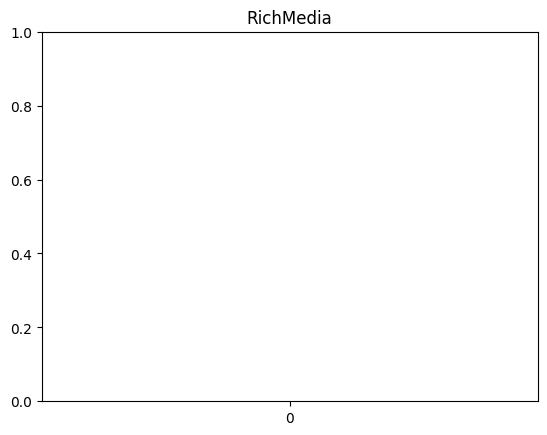

In [29]:
# Histogram penyebaran data benign dan malware pada fitur RichMedia.
x = BenignData["RichMedia"]
y = MalwareData["RichMedia"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("RichMedia")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

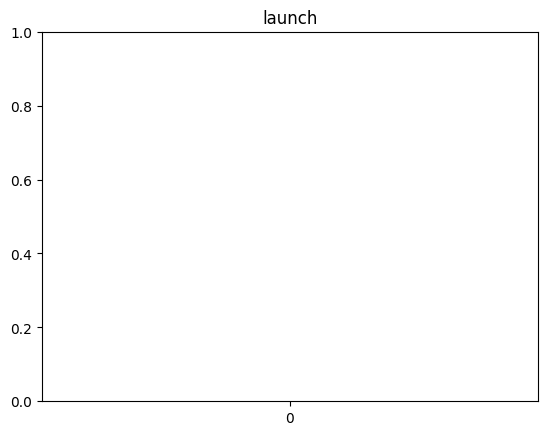

In [31]:
# Histogram penyebaran data benign dan malware pada fitur launch.
x = BenignData["launch"]
y = MalwareData["launch"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("launch")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '8', '0', ..., '0', '0', '0'], dtype=object)

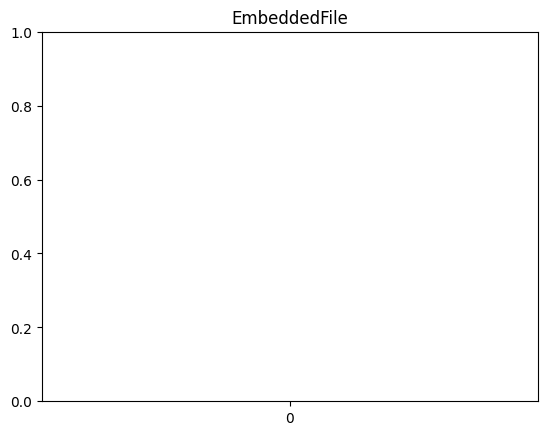

In [32]:
# Histogram penyebaran data benign dan malware pada fitur EmbeddedFile.
x = BenignData["EmbeddedFile"]
y = MalwareData["EmbeddedFile"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("EmbeddedFile")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

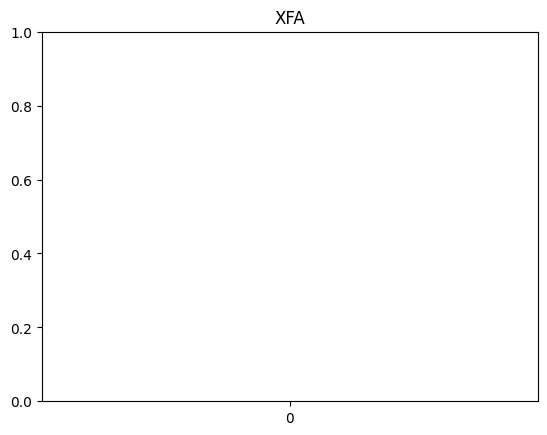

In [33]:
# Histogram penyebaran data benign dan malware pada fitur XFA.
x = BenignData["XFA"]
y = MalwareData["XFA"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("XFA")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur Colors.
x = BenignData["Colors"]
y = MalwareData["Colors"]
bins = np.linspace(-2, 5, 20) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Colors")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

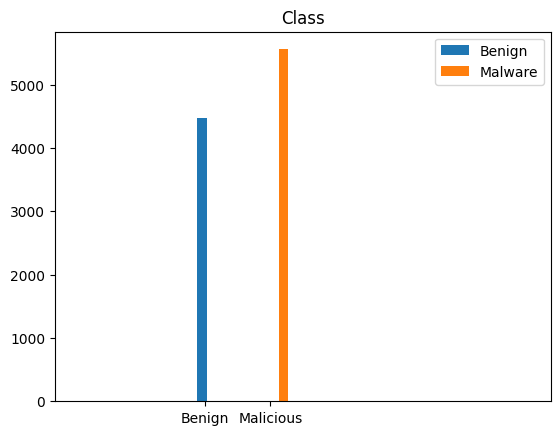

In [34]:
# Histogram penyebaran data benign dan malware pada fitur Class.
x = BenignData["Class"]
y = MalwareData["Class"]
bins = np.linspace(-2, 5, 20) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Class")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [4]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM.drop(['Fine name', 'pdfsize', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class'],axis=1).values # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM['Class'].values # CLass karena merepresentasikan binary class

In [5]:
# Memilih 100% data secara acak dari setiap fitur/column
sampled_data = DM.groupby('Class').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
hasil_threshold = []

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_23284\3131084859.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = DM.groupby('Class').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)


In [6]:
# Menampilkan list feature yang digunakan
Feature = sampled_data.drop(['Fine name', 'pdfsize', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class'],axis=1).columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")

features = []
for i, column_name in enumerate(Feature):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")
    features.append(column_name)

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1 metadata size                            10025           float64


In [7]:
# Pisahkan data menjadi training dan testing
X = sampled_data[['metadata size']]
y = sampled_data['Class'].values

In [8]:
# Hapus NaN
X = pd.DataFrame(X).dropna().values
y = y[pd.DataFrame(X).index]

In [9]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Encode labels ke bentuk numerik jika diperlukan
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
# Inisialisasi variabel untuk menyimpan hasil evaluasi
hasil_ml_dl = []
hasil_ml_dl_xai = []

# Encode labels ke bentuk numerik jika diperlukan
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Function to evaluate ML/DL models
def EvaluateModel(model_name, model, X_train, y_train, X_test, y_test, use_xai=False, is_dl_model=False):
    start_time = time.time()
    
    # Train the model
    if is_dl_model:
        model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    else:
        model.fit(X_train, y_train)
    
    # Predict
    if is_dl_model:
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).ravel()
    elif hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] > 1:  # Multi-class classification model
            y_pred = np.argmax(y_pred_proba, axis=1)
        else:  # Binary classification model
            y_pred = (y_pred_proba > 0.5).astype(int).ravel()
    else:
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).ravel()

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    Precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    Recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    F1Score = 2 * ((Precision * Recall) / (Precision + Recall)) if (Precision + Recall) != 0 else 0
    Accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0

    # Calculate runtime
    run_time = time.time() - start_time

    # If XAI is required, add analysis with SHAP
    if use_xai:
        try:
            if is_dl_model:
                explainer = shap.DeepExplainer(model, X_train)
                shap_values = explainer.shap_values(X_test)
                shap_summary = np.mean(shap_values[0], axis=0)
            else:
                explainer = shap.Explainer(model.predict_proba, X_train)
                shap_values = explainer(X_test)
                shap_summary = shap_values.values.mean(axis=0)
        except Exception as e:
            print(f"Error using SHAP with {model_name}: {e}")
            shap_summary = None

        hasil_ml_dl_xai.append([model_name, Precision, Recall, F1Score, Accuracy, run_time, {'SHAP': shap_summary}])
    else:
        hasil_ml_dl.append([model_name, Precision, Recall, F1Score, Accuracy, run_time])

# Define ML and DL models to evaluate
model_ml_dl = {
    "DecisionTree": DecisionTreeClassifier(max_depth=10),
    "RandomForest": RandomForestClassifier(n_estimators=50),
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=10000),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000),
    "Stochastic Gradient Descent": SGDClassifier(loss='log_loss', random_state=42),
    "ADA Boost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100),
    "LightGBM": LGBMClassifier(n_estimators=100),
    "CatBoost": CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)
}

# Reshape data for DL models
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_dl = {
    "DNN": Sequential([
        Dense(128, input_shape=(X_train_dl.shape[1],), activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),# ERROR karena hanya 1 fitur
    #"CNN": Sequential([
    #    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_dl.shape[1], 1)),
    #    MaxPooling1D(pool_size=2),
    #    Flatten(),
    #    Dense(128, activation='relu'),
    #    Dense(1, activation='sigmoid')
    #]),
    "RNN": Sequential([
        LSTM(100, input_shape=(X_train_dl.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ]),
}

# Evaluate ML models without XAI
for model_name, model in model_ml_dl.items():
    EvaluateModel(model_name, model, X_train, y_train_encoded, X_test, y_test_encoded, use_xai=False)

# Evaluate DL models without XAI
for model_name, model in model_dl.items():
    EvaluateModel(model_name, model, X_train_dl, y_train_encoded, X_test_dl, y_test_encoded, use_xai=False, is_dl_model=True)

# Evaluate ML models with XAI
for model_name, model in model_ml_dl.items():
    EvaluateModel(model_name, model, X_train, y_train_encoded, X_test, y_test_encoded, use_xai=True)

# Evaluate DL models with XAI
for model_name, model in model_dl.items():
    EvaluateModel(model_name, model, X_train_dl, y_train_encoded, X_test_dl, y_test_encoded, use_xai=True, is_dl_model=True)

# Print results
print("\nHasil Evaluasi Model ML/DL tanpa XAI:")
for result in hasil_ml_dl:
    print(result)

print("\nHasil Evaluasi Model ML/DL dengan XAI (SHAP):")
for result in hasil_ml_dl_xai:
    print(result)

# Save evaluation results to CSV files
pd.DataFrame(hasil_ml_dl, columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Runtime']).to_csv('hasil_ml_dl_manual.csv', index=False)
pd.DataFrame(hasil_ml_dl_xai, columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Runtime', 'XAI']).to_csv('hasil_ml_dl_xai_manual.csv', index=False)

[LightGBM] [Info] Number of positive: 3917, number of negative: 3100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7017, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558216 -> initscore=0.233924
[LightGBM] [Info] Start training from score 0.233924
94/94 [==============================] - 0s 787us/step


ExactExplainer explainer: 3009it [00:20, 73.73it/s]                                                                    
ExactExplainer explainer: 3009it [01:23, 31.78it/s]                                                                    


[LightGBM] [Info] Number of positive: 3917, number of negative: 3100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7017, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558216 -> initscore=0.233924
[LightGBM] [Info] Start training from score 0.233924
94/94 [==============================] - 0s 569us/step


C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.s

Error using SHAP with DNN: could not broadcast input array from shape (7017,1) into shape (1,1)
94/94 [==============================] - 0s 761us/step
Error using SHAP with RNN: in user code:

    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 244, in grad_graph  *
        out = self.model(shap_rAnD)
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 371, in custom_grad
        out = op_handlers[type_name](self, op, *grads) # we cut off the shap_ prefix before the lookup
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 663, in handl

C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.s